In [1]:
# This is an example project using EasyLSTM to forecast foreign exchange rates using the IqOption broker API

In [2]:
from iqoptionapi.stable_api import IQ_Option
from sklearn.preprocessing import MinMaxScaler
from easy_lstm import EasyLSTM
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [3]:
api = IQ_Option('easy_lstm_example@email.com', 'samplepassword')
api.connect()

(True, None)

In [4]:
active = 'EURUSD'
timeframe = 3600
candle_count = 1000

candles = pd.DataFrame(api.get_candles(active, timeframe, candle_count, time.time()))
candles.head()

,id,from,at,to,open,close,min,max,volume
0,20209,1612166400,1612170000000408566,1612170000,1.21286,1.20888,1.20883,1.21309,13498
1,20210,1612170000,1612173600000421592,1612173600,1.20888,1.20939,1.20837,1.21043,10684
2,20211,1612173600,1612177200000407146,1612177200,1.20932,1.20798,1.20696,1.20941,9123
3,20212,1612177200,1612180800000414358,1612180800,1.20799,1.20818,1.20727,1.20844,6407
4,20213,1612180800,1612184400000413565,1612184400,1.20819,1.20755,1.20723,1.20887,7834


In [5]:
dataset = candles[['open', 'max', 'min', 'close', 'volume']].copy()
dataset['y'] = dataset['close'].shift(-1, axis=0)
dataset = dataset[:-1]
dataset.head()

,open,max,min,close,volume,y
0,1.21286,1.21309,1.20883,1.20888,13498,1.20939
1,1.20888,1.21043,1.20837,1.20939,10684,1.20798
2,1.20932,1.20941,1.20696,1.20798,9123,1.20818
3,1.20799,1.20844,1.20727,1.20818,6407,1.20755
4,1.20819,1.20887,1.20723,1.20755,7834,1.20848


In [6]:
scaler = MinMaxScaler()
scaled_dataset = dataset.copy()
scaled_dataset[scaled_dataset.columns] = scaler.fit_transform(scaled_dataset)
scaled_dataset.head()

,open,max,min,close,volume,y
0,0.786067,0.786326,0.734893,0.710516,0.535726,0.720197
1,0.710516,0.735669,0.725926,0.720197,0.423148,0.693432
2,0.718869,0.716245,0.698441,0.693432,0.360698,0.697229
3,0.693622,0.697772,0.704483,0.697229,0.252040,0.685270
4,0.697418,0.705961,0.703704,0.685270,0.309129,0.702923


In [7]:
model, X_train, y_train, X_test, y_test = EasyLSTM(scaled_dataset, n_steps=8).do_magic()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 80)             27520     
_________________________________________________________________
dropout (Dropout)            (None, 8, 80)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 40)                19360     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 46,921
Trainable params: 46,921
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
25/25 [==============================] - 4s 7ms/step - loss: 0.1009
Epoch 2/200
25/25 [==============================] - 0s 7ms/step - loss: 0.0105
Epoch 3/200
25/25 [==============================] - 0s 7ms/step - loss: 0.0084
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 6/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 7/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0061
Epoch 8/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 9/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 10/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 11/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 12/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 13/200
25/25 [=================

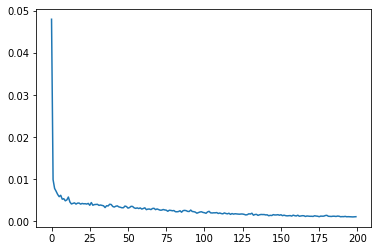

In [7]:
history = model.fit(X_train, y_train, epochs=200, verbose=0)
plt.plot(history.history['loss'])

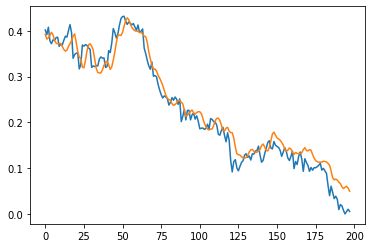

In [8]:
predictions = model.predict(X_test)

plt.plot(y_test)
plt.plot(predictions)